<a href="https://colab.research.google.com/github/karthikasi/Task-6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.shape

(15, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chirps/Second,15.0,16.566667,1.712837,14.4,15.45,16.0,17.15,20.0
Ground Temperature,15.0,79.346667,7.020467,69.4,73.40,80.6,83.40,93.3


In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


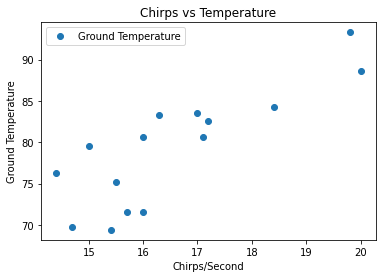

In [ ]:
df.plot(x="Chirps/Second",y="Ground Temperature", style="o")
plt.title("Chirps vs Temperature")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.show()

In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

In [ ]:
y_test

3     84.3
7     71.6
6     69.7
2     93.3
10    79.6
Name: Ground Temperature, dtype: float64

In [ ]:
# for linear regression with single variable scalling is not mandatory 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=regressor.predict(X_test)
y_predict

array([84.88975572, 76.80423716, 73.80960066, 89.08224682, 74.70799161])

In [ ]:
regressor.intercept_  # C - Value..

29.788444097713217

In [ ]:
regressor.coef_  # m - Slope Value..

array([2.9946365])

In [ ]:
#y=mx + c   Linear regreesor equation

In [ ]:
from sklearn import metrics
print("R2_score Value :",metrics.r2_score(y_test,y_predict))

R2_score Value : 0.7685427938033862


In [ ]:
chirp_Temperature= pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
chirp_Temperature

,Actual,Predicted
3,84.3,84.889756
7,71.6,76.804237
6,69.7,73.809601
2,93.3,89.082247
10,79.6,74.707992


In [ ]:
#Interapolate Value
interapolate_value=regressor.predict([[18]])
print("Interapolate Value :",interapolate_value)

Interapolate Value : [83.69190112]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Extrapolate Value
extra=regressor.predict([[21.8]])
extra

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([95.07151982])

Conclusion:

The co-relation is greater than 0.8 , it shows there is high corelationship 


The R2_score value of this above Linear Regression model is 76.8 % ..

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:

df1 = pd.read_fwf("brain_body.txt")

In [ ]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df1.shape

(62, 2)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Brain,62.0,198.789984,899.158011,0.005,0.60,3.3425,48.2025,6654.0
Body,62.0,283.134194,930.278942,0.140,4.25,17.2500,166.0000,5712.0


In [ ]:
df1.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df1.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


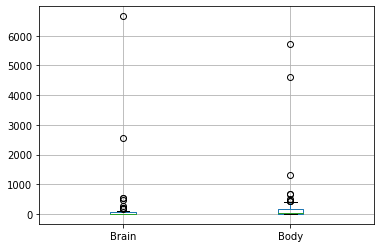

In [ ]:
df1.boxplot()

In [ ]:
Q1=df1["Brain"].quantile(0.25)
print(Q1)
Q3=df1["Brain"].quantile(0.75)
print(Q3)
IQR=Q3 - Q1
print(IQR)

0.6000000000000001
48.2025
47.6025


In [ ]:
upper_limit = Q3 + 1.5 * (Q3-Q1)
lower_limit = Q1 - 1.5 * (Q3-Q1)
print(upper_limit)
print(lower_limit)

119.60625
-70.80375000000001


In [ ]:
df1['Brain'] = np.where(
    df1['Brain']>upper_limit,
    upper_limit,
    np.where(
        df1['Brain']<lower_limit,
        lower_limit,
        df1['Brain']
    ) 
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


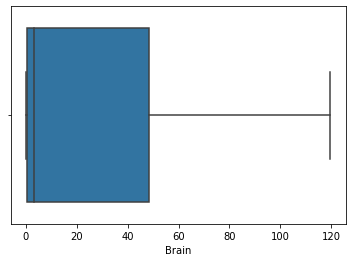

In [ ]:
import seaborn as sns
sns.boxplot(df1['Brain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


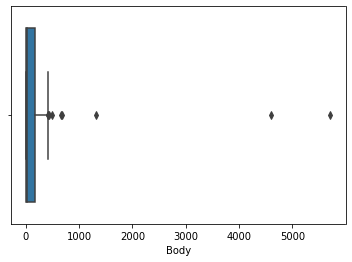

In [ ]:
sns.boxplot(df1['Body'])

In [ ]:
Q1=df1['Body'].quantile(0.25)
print(Q1)
Q3=df1['Body'].quantile(0.75)
print(Q3)
IQR= Q3 - Q1
print(IQR)

4.25
166.0
161.75


In [ ]:
upper_limit = Q3 + 1.5 * (Q3-Q1)
lower_limit = Q1 - 1.5 * (Q3-Q1)
print(upper_limit)
print(lower_limit)

408.625
-238.375


In [ ]:
df1['Body'] = np.where(
    df1['Body']>upper_limit,
    upper_limit,
    np.where(
        df1['Body']<lower_limit,
        lower_limit,
        df1['Body']
    ) )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


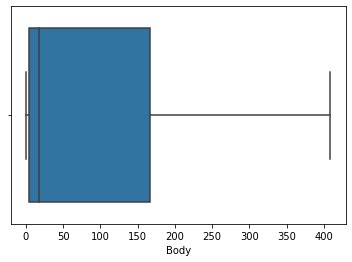

In [ ]:
sns.boxplot(df1['Body'])

In [ ]:
df1['Brain'].describe()

count     62.000000
mean      29.176476
std       45.213842
min        0.005000
25%        0.600000
50%        3.342500
75%       48.202500
max      119.606250
Name: Brain, dtype: float64

In [ ]:
df1['Body'].describe()

count     62.000000
mean     104.676532
std      148.635231
min        0.140000
25%        4.250000
50%       17.250000
75%      166.000000
max      408.625000
Name: Body, dtype: float64

In [ ]:
X=df1.loc[:,['Brain']].values
Y=df1.loc[:,'Body'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
Y_test

array([ 12.3  , 408.625,   3.9  ,  81.   ,   1.9  ,  56.   ,   5.7  ,
       408.625,   8.1  , 175.   ,  17.5  , 119.5  ,   4.   , 408.625,
       406.   , 179.   ,  50.4  , 408.625,   5.5  ])

In [ ]:
X_train.shape,X_test.shape

((43, 1), (19, 1))

In [ ]:
# for linear regression with single variable scalling is not mandatory 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([ 21.05078598, 344.18865935,  28.52728934, 182.13544915,
        19.77298359, 114.16723684,  21.51296983, 160.82061777,
        22.68202308, 169.90117094,  22.84514679, 117.78314574,
        19.28633119, 344.18865935, 344.18865935,  37.49909336,
        30.52555478, 344.18865935,  21.83921724])

In [ ]:
Y_test

array([ 12.3  , 408.625,   3.9  ,  81.   ,   1.9  ,  56.   ,   5.7  ,
       408.625,   8.1  , 175.   ,  17.5  , 119.5  ,   4.   , 408.625,
       406.   , 179.   ,  50.4  , 408.625,   5.5  ])

In [ ]:
act_pred=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
act_pred

,Actual,Predicted
0,12.300,21.050786
1,408.625,344.188659
2,3.900,28.527289
3,81.000,182.135449
4,1.900,19.772984
5,56.000,114.167237
6,5.700,21.512970
7,408.625,160.820618
8,8.100,22.682023
9,175.000,169.901171


In [ ]:
regressor.intercept_  # C - VALUE

19.01173961233428

In [ ]:
regressor.coef_ # slope(m) - VALUE

array([2.71872849])

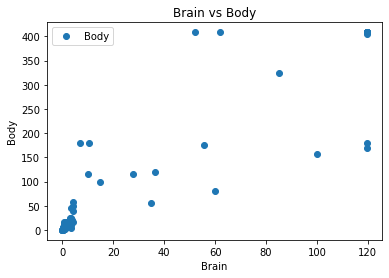

In [ ]:
df1.plot(x="Brain",y="Body",style="o")
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

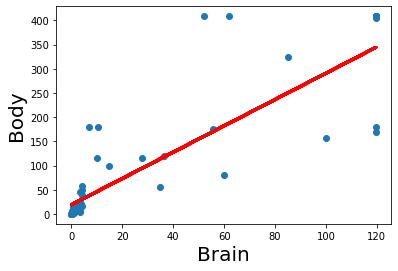

In [ ]:
plt.scatter(X,Y)                     
y_new = regressor.coef_*X + regressor.intercept_            
plt.plot(X,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Brain', fontsize=20)      
plt.ylabel('Body', fontsize=20)       
plt.show()

In [ ]:
from sklearn import metrics
print("R_2 score value :",metrics.r2_score(Y_test,y_pred))

R_2 score value : 0.7819152932422735


Conclusion:

The corelation value is greater than 0.8 ,it shows the strong correlation

The R2_score value for this above Linear regression model is 78 % .. 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df2.shape

(52, 6)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Rank,52.0,2.038462,0.862316,1.0,1.00,2.0,3.00,3.0
Year,52.0,7.480769,5.507536,0.0,3.00,7.0,11.00,25.0
Degree,52.0,0.653846,0.480384,0.0,0.00,1.0,1.00,1.0
YSdeg,52.0,16.115385,10.222340,1.0,6.75,15.5,23.25,35.0
Salary,52.0,23797.653846,5917.289154,15000.0,18246.75,23719.0,27258.50,38045.0


In [ ]:
df2.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
df2.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df2.Sex.value_counts()

0    38
1    14
Name: Sex, dtype: int64

In [ ]:
df2.Rank.value_counts()

3    20
1    18
2    14
Name: Rank, dtype: int64

In [ ]:
df2.Degree.value_counts()

1    34
0    18
Name: Degree, dtype: int64

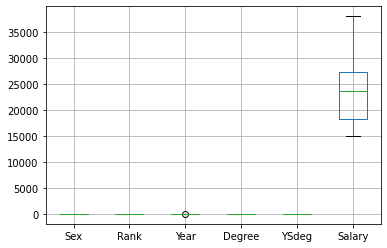

In [ ]:
df2.boxplot()

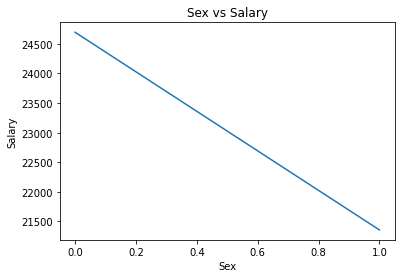

In [ ]:
df2.groupby('Sex')['Salary'].mean().plot()  # Sex and Salary has negative corelation..
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
sex=df2["Sex"]
sex=sex.map({1:"Male",0:"Female"})

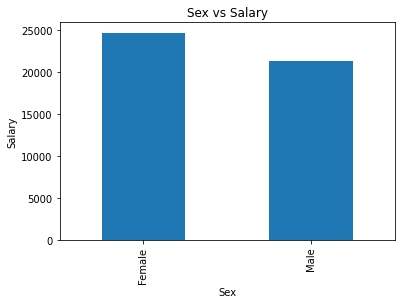

In [ ]:
df2.groupby(sex)['Salary'].mean().plot(kind="bar")
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [ ]:
X=df2[["Sex","Rank","Year","Degree","YSdeg"]].values
Y=df2["Salary"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [ ]:
X_train.shape,X_test.shape

((36, 5), (16, 5))

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([28993.34499261, 16598.10094268, 30453.3600977 , 17260.54562726,
       17080.96071051, 18966.28654598, 23450.90187105, 17260.54562726,
       17614.61482154, 25289.18504199, 17080.96071051, 28850.74370957,
       21505.65209023, 25479.24852141, 33479.30927822, 26933.11534775])

In [ ]:
res=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
res

,Actual,Predicted
0,28200,28993.344993
1,18075,16598.100943
2,32850,30453.360098
3,16686,17260.545627
4,17600,17080.960711
5,18304,18966.286546
6,23712,23450.901871
7,15000,17260.545627
8,15350,17614.614822
9,24900,25289.185042


In [ ]:
reg.intercept_  #C-Value

11410.14654725559

In [ ]:
 #M - Value
 Frame=pd.DataFrame(reg.coef_,["Sex","Rank","Years","Degree","YSdeg"],columns=["Co-efficients"])
 Frame

,Co-efficients
Sex,1241.792500
Rank,5586.181450
Years,482.859768
Degree,-1331.644063
YSdeg,-128.790574


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,y_pred))

R2- SCORE: 0.8481972214195266


In [ ]:
df2["Sex"].replace(to_replace=(0,1),value=("male","Female"),inplace=True)

In [ ]:
df2.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,male,3,25,1,35,36350
1,male,3,13,1,22,35350
2,male,3,10,1,23,28200


In [ ]:
df2["Degree"].replace(to_replace=(0,1),value=("Masters","Doctorate"),inplace=True)

In [ ]:
df2["Rank"].replace(to_replace=(1,2,3),value=("Assistant Professor","Assosiate Professor","Professor"),inplace=True)

In [ ]:
df2.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,male,Professor,25,Doctorate,35,36350
1,male,Professor,13,Doctorate,22,35350
2,male,Professor,10,Doctorate,23,28200


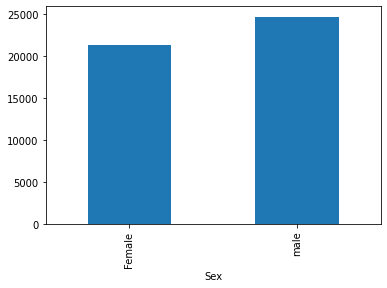

In [ ]:
df2.groupby('Sex')['Salary'].mean().plot(kind="bar")

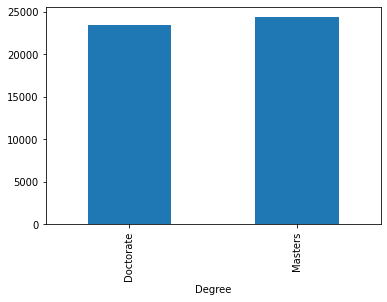

In [ ]:
df2.groupby('Degree')['Salary'].mean().plot(kind="bar")

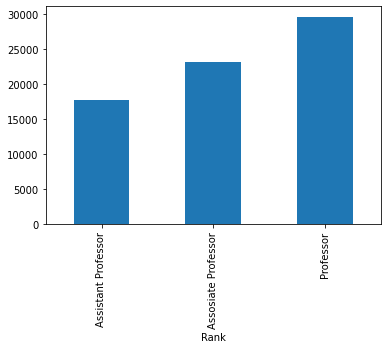

In [ ]:
df2.groupby('Rank')['Salary'].mean().plot(kind='bar')

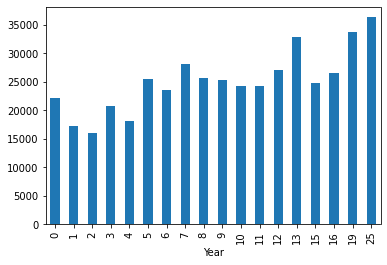

In [ ]:
df2.groupby('Year')['Salary'].mean().plot(kind='bar')

Conclusion:

The co-relation is greater than 0.8 , so it shows good corelationship..

The R2 Score of this above model is 84 % ..
 
Sex makes impact on Salary, but When compare to Rank and Year, Sex makes less impact on Salary .